In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal?

In [4]:
mean_1 = np.array([1, 0.5])
cov_1 = np.array([[1, 0.1], [0.1, 0.2]])

mean_2 = np.array([4, 5])
cov_2 = np.array([[1.2, 0.1], [0.1, 1.3]])

In [5]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

In [6]:
print(dist_1.shape, dist_2.shape)

(500, 2) (500, 2)


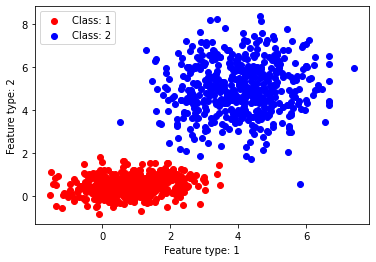

In [7]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], color = 'red', label = 'Class: 1')
plt.scatter(dist_2[:, 0], dist_2[:, 1], color = 'blue', label = 'Class: 2')
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.legend()
plt.show()

In [8]:
dataset = np.zeros((1000, 3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1
print(dataset[: 10])
print(dataset[: -10])

[[-0.83040955 -0.26483996  0.        ]
 [ 1.82769231  0.48745047  0.        ]
 [ 0.49349748  0.1941584   0.        ]
 [ 2.2381681   0.84845607  0.        ]
 [ 2.44129219  0.56441933  0.        ]
 [-0.49217003  0.65777272  0.        ]
 [ 2.86604836 -0.39396174  0.        ]
 [ 0.38253835  0.12427106  0.        ]
 [ 0.83247243 -0.24329804  0.        ]
 [ 0.7229146   0.48013294  0.        ]]
[[-0.83040955 -0.26483996  0.        ]
 [ 1.82769231  0.48745047  0.        ]
 [ 0.49349748  0.1941584   0.        ]
 ...
 [ 4.76614556  6.22152726  1.        ]
 [ 4.47585276  4.71256485  1.        ]
 [ 3.81100654  5.95819511  1.        ]]


In [9]:
np.random.shuffle(dataset)

In [10]:
print(dataset[: 10])

[[ 1.12065751  0.5852179   0.        ]
 [ 3.46162002  0.49784261  0.        ]
 [ 0.49862456  0.61137309  0.        ]
 [ 5.47476318  5.63855211  1.        ]
 [-0.13562236  0.64884378  0.        ]
 [ 4.3845135   1.72676188  1.        ]
 [ 0.24383808  0.30071175  0.        ]
 [ 2.58691905  4.68664693  1.        ]
 [ 2.59081023  0.80979989  0.        ]
 [-0.10365824  0.28499962  0.        ]]


In [11]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [13]:
Y_test

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

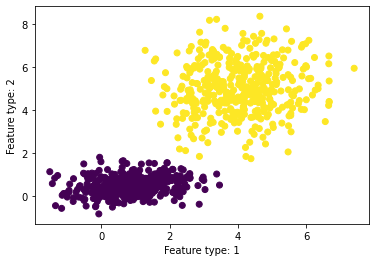

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [17]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
print(mean, std)

[2.47202776 2.75305326] [1.89676154 2.44267678]


In [18]:
X_train = (X_train - mean)/std

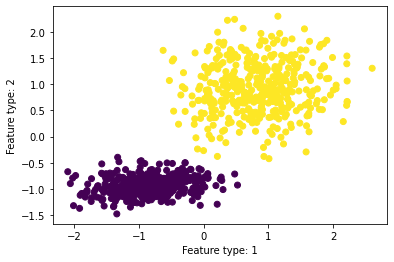

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [20]:
X_test = (X_test - mean)/std

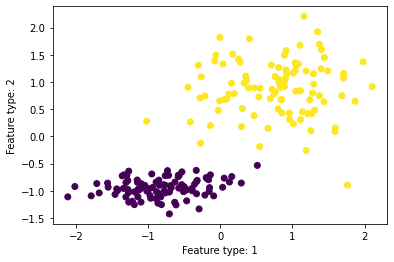

In [21]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [22]:
print(X_train.std())

0.9999999999999997


In [23]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

In [24]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [27]:
random_values = np.linspace(-300, 300, 20)

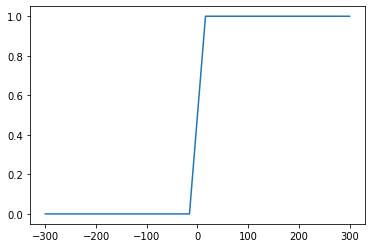

In [28]:
plt.plot(random_values, sigmoid(random_values))

In [30]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1 - h_theta))
    cost = cost*-1

    return cost

In [31]:
def gradient(X, Y, theta):

  h_theta = hypothesis(X, theta)

  grad = np.dot(X.T, (Y - h_theta))

  return grad/X.shape[0]

In [32]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

  m, n = X.shape
  theta = np.zeros((n, 1))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost_function(X, Y, theta)
    cost_epoch.append(e)

    theta = theta + learning_rate*grad

  return (theta, cost_epoch)

In [33]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
Y_train = Y_train.reshape((-1, 1))

[[ 1.         -0.71246186 -0.88748351]
 [ 1.          0.52172729 -0.92325381]
 [ 1.         -1.04040658 -0.87677592]
 [ 1.          1.58308535  1.18128558]] (800, 3)


In [34]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.1, max_steps = 1000)

In [35]:
theta

array([[0.51150304],
       [2.47710128],
       [3.5723371 ]])

In [36]:
cost_epoch

[0.6931471805599452,
 0.6550184505513971,
 0.6202261473604626,
 0.5884596315750311,
 0.5594275051261326,
 0.5328602598254393,
 0.508511392862848,
 0.48615738172111983,
 0.46559686917050386,
 0.44664934636226145,
 0.42915355557106877,
 0.41296577359991204,
 0.39795808658126075,
 0.3840167277681951,
 0.3710405209492609,
 0.35893945161527296,
 0.3476333740920407,
 0.3370508538437596,
 0.32712813865786133,
 0.3178082493646238,
 0.3090401793211964,
 0.30077819152216234,
 0.2929812024828791,
 0.28561224270155605,
 0.2786379843578515,
 0.27202832783120934,
 0.26575603954758625,
 0.2597964345452427,
 0.25412709796553345,
 0.24872764041266016,
 0.24357948278476765,
 0.23866566676001752,
 0.23397068763049284,
 0.2294803466204291,
 0.2251816202102151,
 0.2210625443206764,
 0.21711211149976506,
 0.21332017950182802,
 0.2096773898633996,
 0.2061750952636509,
 0.2028052946163375,
 0.1995605749768928,
 0.19643405946631134,
 0.19341936051532024,
 0.1905105378203389,
 0.1877020604788413,
 0.18498877283

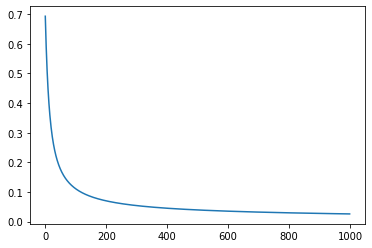

In [30]:
plt.plot(cost_epoch)

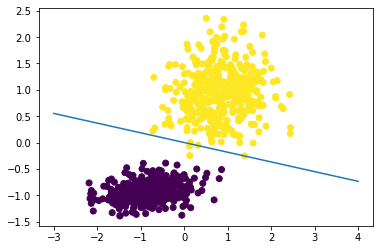

In [31]:
x1 = np.arange(-3, 5)

x2 = -(theta[0] * theta[1]*x1)/theta[2]

plt.scatter(X_train[:, 1], X_train[:, 2], c = Y_train)
plt.plot(x1, x2)

In [32]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
Y_test = Y_test.reshape((-1, 1))

[[ 1.          0.84596743  0.93387489]
 [ 1.          0.21236947  0.4674041 ]
 [ 1.          0.80451334  0.86540209]
 [ 1.          1.18981017 -0.23567782]] (200, 3)


In [33]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

In [34]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [35]:
for i in range(len(test_preds)):
    print(test_preds[i], Y_test[i])

[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[

In [40]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [44]:
accuracy(test_preds, Y_test)

1.0


In [45]:
accuracy(train_preds, Y_train)

0.995


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [51]:
model.fit(X_train, Y_train.reshape((-1, )))

LogisticRegression()

In [54]:
theta_0 = model.intercept_
theta_r = model.coef_

In [55]:
print(theta_0, theta_r)

[0.7575724] [[5.33200835e-07 1.85941355e+00 5.04949657e+00]]


In [56]:
model.score(X_train, Y_train.reshape((-1, )))

0.99875

In [57]:
model.score(X_test, Y_test.reshape((-1, )))

1.0

In [58]:
y_pred = model.predict(X_test)

In [59]:
y_pred

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.])